In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
# Load checkpoints
checkpoint_dir = "gated_attention_checkpoints_v2"

print(f"Loading checkpoints from {checkpoint_dir}/")

baseline_ckpt = torch.load(f"{checkpoint_dir}/Baseline_final.pt")
elementwise_ckpt = torch.load(f"{checkpoint_dir}/Elementwise_Gating_final.pt")

baseline_losses = baseline_ckpt['losses']
elementwise_losses = elementwise_ckpt['losses']

print(f"\nBaseline: {len(baseline_losses)} training steps")
print(f"Gated: {len(elementwise_losses)} training steps")

Loading checkpoints from gated_attention_checkpoints_v2/

Baseline: 7776 training steps
Gated: 7776 training steps



Plot saved as: training_rolling_average.png


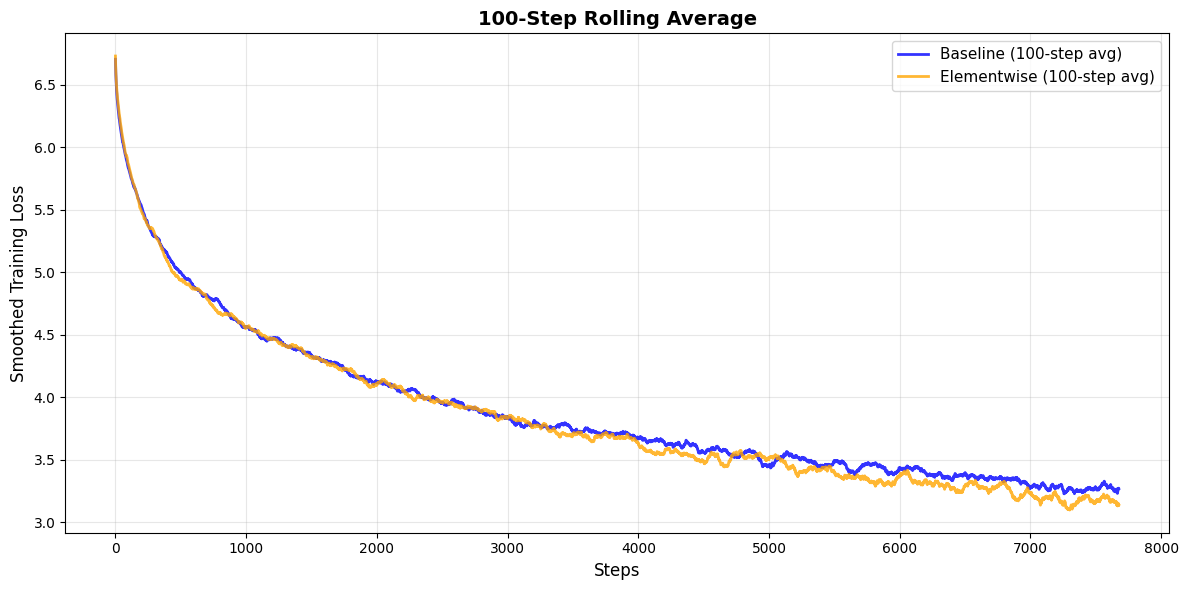


Final smoothed loss:
  Baseline:     3.2697
  Elementwise:  3.1385
  Difference:   0.1312


In [ ]:
def rolling_average(data, window=100):
    """Compute rolling average with specified window size"""
    if len(data) < window:
        return data
    return np.convolve(data, np.ones(window)/window, mode='valid')

baseline_np = np.array(baseline_losses)
elementwise_np = np.array(elementwise_losses)

window_size = 100
baseline_smooth = rolling_average(baseline_np, window_size)
elementwise_smooth = rolling_average(elementwise_np, window_size)
steps_smooth = np.arange(len(baseline_smooth))

plt.figure(figsize=(12, 6))

plt.plot(steps_smooth, baseline_smooth, label=f'Baseline ({window_size}-step avg)', 
         color='blue', linewidth=2, alpha=0.8)
plt.plot(steps_smooth, elementwise_smooth, label=f'Elementwise ({window_size}-step avg)', 
         color='orange', linewidth=2, alpha=0.8)

plt.xlabel('Steps', fontsize=12)
plt.ylabel('Smoothed Training Loss', fontsize=12)
plt.title(f'{window_size}-Step Rolling Average', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

output_filename = 'training_rolling_average.png'
plt.savefig(output_filename, dpi=150, bbox_inches='tight')
print(f"\nPlot saved as: {output_filename}")

plt.show()

print(f"\nFinal smoothed loss:")
print(f"  Baseline:     {baseline_smooth[-1]:.4f}")
print(f"  Elementwise:  {elementwise_smooth[-1]:.4f}")
print(f"  Difference:   {baseline_smooth[-1] - elementwise_smooth[-1]:.4f}")